In [1]:
import sys

parent_dir = 'Predict-Future-Sales'
p_sub = sys.path[0]

ride = ''
for path in p_sub.split('/'):
    if path != parent_dir:
        ride = ride + path + '/'
    else:
        ride = ride + path + '/'
        break
sys.path[0] = ride

import datetime
from typing import Tuple

import numpy as np
from numpy import ndarray
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch
from torch import Tensor

/Users/lino/opt/anaconda3/envs/for_pytorch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pickle
import pathlib
import glob

seq = 7
d_model = 128
dilation = 0
model_path = './models/'
file_name = f'seq{seq}_dmodel{d_model}_dilation{dilation}.pkl'

with open (model_path + file_name, 'rb') as f:
    obj = pickle.load(f)
file_name

'seq7_dmodel128_dilation0.pkl'

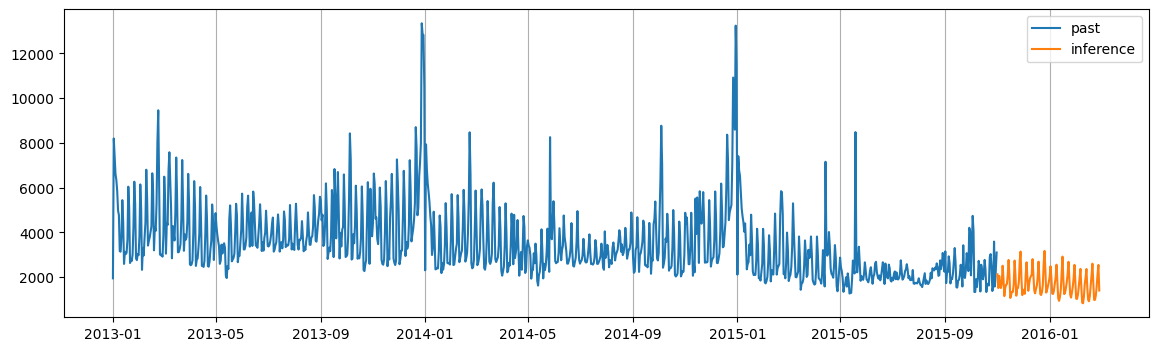

In [5]:
from module.lino_module.inference import recurrent_inference
from module.lino_module.preprocess import mode_of_freq

freq = 120
model = obj['model']
env_kwrgs = obj['env']
inference = recurrent_inference(freq, model, **env_kwrgs)

# 予測データをプロット
import matplotlib.pyplot as plt

data = pd.read_csv('../data/sales_train.csv')
original = mode_of_freq(data).item_cnt_day

plt.figure(figsize=(14, 4))
plt.plot(original, label='past')
plt.plot(inference, label='inference')
plt.grid(axis='x')
plt.legend()

受容野やだけでなく月や週ごとの特徴量を持たせる必要がある。